In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.io as sio
import os
import ieeg_funcs as ief
import dgFuncs as dg
from sklearn import svm
from sklearn.externals import joblib

In [1]:
# Block for re-loading my libraries if I make updates
import imp 
imp.reload(ief) 
imp.reload(dg) 

NameError: name 'ief' is not defined

In [6]:
print(perf['valid_bal_acc'].shape)
bro=np.mean(perf['valid_bal_acc'],axis=0)
bro.shape

(8, 4)


(4,)

In [ ]:
bro=np.random.uniform(0,1,10)


In [2]:
# Load results
#perf=np.load('classification_metrics_grid.npz')
#perf=np.load('classification_metrics_pwr_vltg.npz')
#perf=np.load('class_metrics_marr_srch.npz')
perf=np.load('ongoing.npz')

# Get xtick labels
str(perf['try_C'])
xlabs=list()
for c in perf['try_C']:
    xlabs.append(str(c))
print(xlabs)

['0.02', '0.04', '0.06', '0.08']


In [35]:
path_dict=ief.get_path_dict()
print(path_dict.keys())
print(path_dict['szr_ant_root'])

dict_keys(['onset_csv', 'pics', 'ftrs_root', 'ieeg_root', 'szr_ant_root'])
/Users/davidgroppe/PycharmProjects/SZR_ANT/


In [36]:
from sklearn.externals import joblib
joblib.dump?

In [39]:
perf.keys()

['train_spec',
 'valid_spec',
 'train_subs_list',
 'C_ct',
 'mn_stim_latency',
 'pcnt_missed_szrs',
 'valid_sens',
 'try_C',
 'valid_bal_acc',
 'train_bal_acc',
 'train_sens',
 'left_out_id']

In [8]:
dat=perf['pcnt_missed_szrs']
dat.shape

(8, 6)

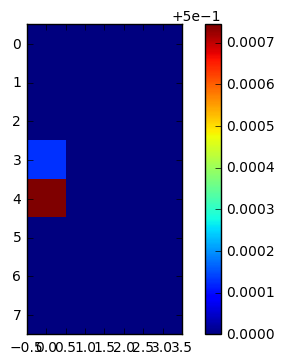

In [3]:
dat=perf['valid_bal_acc']
# dat=perf['pcnt_missed_szrs']
_=plt.imshow(dat,interpolation='nearest')
_=plt.colorbar()

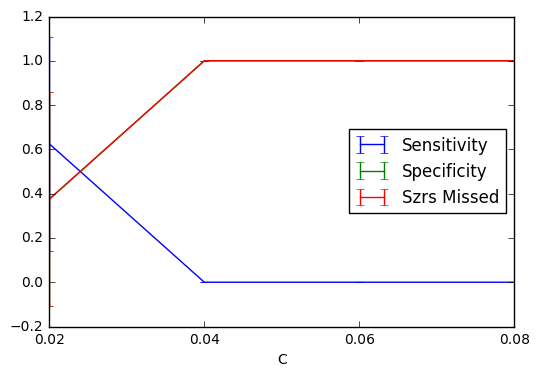

In [4]:
# Valid Sensitivity and Specificity
dat=perf['valid_sens']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Sensitivity')
dat=perf['valid_spec']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Specificity')
dat=perf['pptn_missed_szrs']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Szrs Missed')
#plt.ylabel('Balanced Accuracy')
plt.xlabel('C')
#plt.xticks(np.arange(len(perf['try_C'])),label=xlabs)
plt.xticks(np.arange(len(perf['try_C'])),xlabs)
# plt.xtick(np.arange(len(perf['try_C'])),label=xlabs)
plt.legend(loc='best')

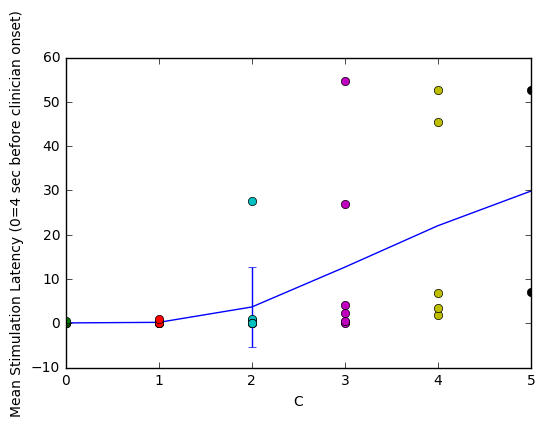

In [33]:
dat=perf['mn_stim_latency']
_=plt.errorbar(np.arange(dat.shape[1]),np.nanmean(dat,axis=0),np.std(dat,axis=0))
n_subs=dat.shape[0]
for a in range(dat.shape[1]):
    _=plt.plot(np.ones(n_subs)*a,dat[:,a],'o')
plt.ylabel('Mean Stimulation Latency (0=4 sec before clinician onset)')
plt.xlabel('C')
# plt.yscale('log')
# plt.xlim([-.5, 1.5])
# plt.ylim([-.5, 1.5])

In [30]:
dat=perf['valid_spec']
print(1-np.mean(dat,axis=0))
dat=perf['pcnt_missed_szrs']
print(1-np.mean(dat,axis=0))

[ 0.80477066  0.7122059   0.53538686  0.16713257  0.00350104  0.00172186]
[ 1.          1.          0.97916667  0.55245098  0.11678922  0.03541667]


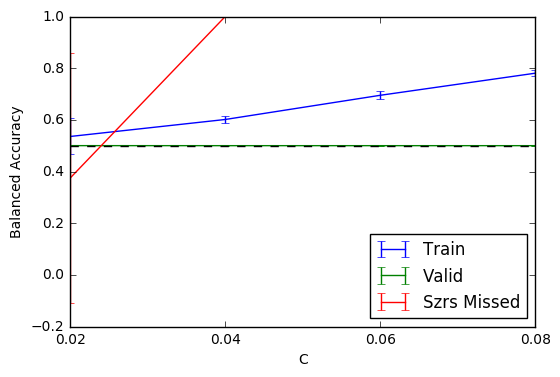

In [5]:
# Balanced Accuracy
dat=perf['train_bal_acc']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Train')
dat=perf['valid_bal_acc']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Valid')
dat=perf['pptn_missed_szrs']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Szrs Missed')
_=plt.plot([0, dat.shape[1]-1],[0.5, 0.5],'k--')
plt.ylabel('Balanced Accuracy')
plt.xlabel('C')
#plt.xticks(np.arange(len(perf['try_C'])),label=xlabs)
plt.xticks(np.arange(len(perf['try_C'])),xlabs)
# plt.xtick(np.arange(len(perf['try_C'])),label=xlabs)
plt.legend(loc='best')

In [18]:
try_C=np.linspace(0.07,0.13,6)
print(try_C)

[ 0.07   0.082  0.094  0.106  0.118  0.13 ]


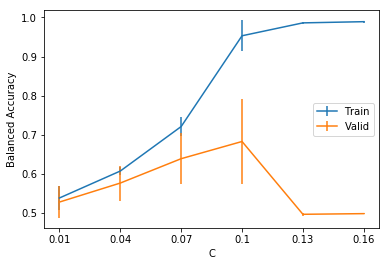

In [16]:
# Balanced Accuracy
dat=perf['train_bal_acc']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Train')
dat=perf['valid_bal_acc']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Valid')
plt.ylabel('Balanced Accuracy')
plt.xlabel('C')
#plt.xticks(np.arange(len(perf['try_C'])),label=xlabs)
plt.xticks(np.arange(len(perf['try_C'])),xlabs)
# plt.xtick(np.arange(len(perf['try_C'])),label=xlabs)
plt.legend(loc='right')

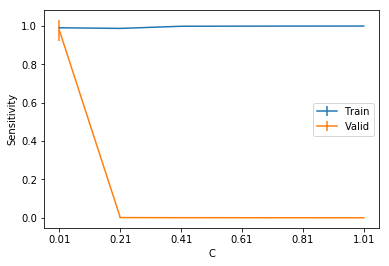

In [8]:
# Sensitivity
dat=perf['train_sens']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Train')
dat=perf['valid_sens']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Valid')
plt.ylabel('Sensitivity')
plt.xlabel('C')
#plt.xticks(np.arange(len(perf['try_C'])),label=xlabs)
plt.xticks(np.arange(len(perf['try_C'])),xlabs)
# plt.xtick(np.arange(len(perf['try_C'])),label=xlabs)
plt.legend(loc='right')

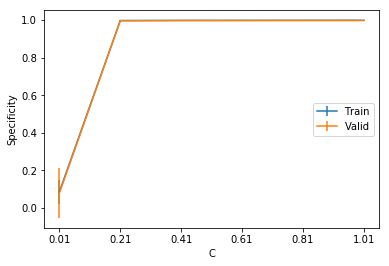

In [9]:
# Specificity
dat=perf['train_spec']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Train')
dat=perf['valid_spec']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Valid')
plt.ylabel('Specificity')
plt.xlabel('C')
#plt.xticks(np.arange(len(perf['try_C'])),label=xlabs)
plt.xticks(np.arange(len(perf['try_C'])),xlabs)
# plt.xtick(np.arange(len(perf['try_C'])),label=xlabs)
plt.legend(loc='right')

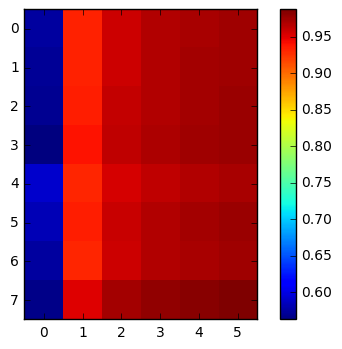

In [46]:
_=plt.imshow(perf['train_bal_acc'],interpolation='nearest')
_=plt.colorbar()

In [11]:
np.arange(0.01,0.17,.03)

array([ 0.01,  0.04,  0.07,  0.1 ,  0.13,  0.16])